### Загрузка данных и первичный осмотр
Импортируем необходимые библиотеки

In [2]:
import pandas as pd  # импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

Загрузка учебного датасета с помощью pd.read_csv

In [3]:
df = pd.read_csv("S02-hw-dataset.csv")  # прочитали csv файл, которого до этого импортировали в репозиторий с помощью команды curl
df

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [5]:
print(df.head(6)) # выведем первые 6 строк
print(df.tail(6))  # последние 6 строк

   user_id    age country  purchases  revenue
0        1   25.0      FR          7      749
1        2   24.0      RU          5     1115
2        3   52.0      FR          7      399
3        4   31.0      RU          6      654
4        5    NaN      DE          6     1296
5        6  120.0      FR         -1      785
    user_id   age country  purchases  revenue
35       36  51.0      US          3      342
36       37  18.0      DE          4     1104
37       38  35.0      DE          3      738
38       39  39.0      FR          7     1162
39       40  34.0      RU          7     2086
40       10  24.0      RU          7      511


In [6]:
print(df.info())  # информация по всем столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None


In [7]:
df.info(verbose=False)  # Сводка по количеству столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Columns: 5 entries, user_id to revenue
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [8]:
print(df.shape)  # размер данных
print(df.shape[0])  # количество строк
print(df.shape[1])  # количество столбцов

(41, 5)
41
5


In [9]:
print(df.describe(include='all'))  # Общая статистика DataFlame
print(df.describe(include=[np.number]))  # Статистика только столбцов с числами

          user_id         age country  purchases      revenue
count   41.000000   39.000000      41  41.000000    41.000000
unique        NaN         NaN       5        NaN          NaN
top           NaN         NaN      RU        NaN          NaN
freq          NaN         NaN      13        NaN          NaN
mean    20.243902   36.512821     NaN   4.829268   820.048780
std     11.659289   18.304259     NaN   2.710189   613.127269
min      1.000000    5.000000     NaN  -1.000000     0.000000
25%     10.000000   24.000000     NaN   3.000000   432.000000
50%     20.000000   33.000000     NaN   5.000000   693.000000
75%     30.000000   45.500000     NaN   7.000000  1115.000000
max     40.000000  120.000000     NaN  11.000000  2475.000000
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     

### Пропуски, дубликаты и базовый контроль качества
Посчитаем долю пропусков в каждом столбце
Проверим наличие полностью дублирующих строк
Найдём и выведем «подозрительные» случаи, исходя из смысла датасета. Примеры:
- отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);
- нереалистичные значения (например, возраст > 100, нулевой доход при ненулевых количествах и т.п.);
- другие логические противоречия, характерные для конкретного датасета.

In [9]:
print(df.isnull().sum())  # Пропущенные значения по столбцам

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64


In [10]:
for column in df.columns:
    miss_c = df[column].isna().sum()
    if miss_c > 0:
        print(f"{column}-пропуски: {miss_c}")

age-пропуски: 2


In [11]:
dupl_c = df.duplicated().sum()
print()
if dupl_c > 0:
    print(df[df.duplicated(keep=False)].head()) # вывод дублирующих строк


    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511


In [12]:
problems = {}
problems['Дубликаты user_id'] = df['user_id'].duplicated().sum()
problems['Пропуски в возрасте'] = df['age'].isnull().sum()
problems['Возраст <= 0'] = len(df[df['age'] <= 0])
problems['Возраст аномальных долгожителей'] = len(df[df['age'] > 100])
problems['Покупки < 0'] = len(df[df['purchases'] < 0])
problems['Страна в числах'] = df['country'].isin(['1', '2', '3', '4', '5', '6', '7', '8', '9']).sum()

for problem, count in problems.items():
    print(f"  {problem}: {count}")

  Дубликаты user_id: 1
  Пропуски в возрасте: 2
  Возраст <= 0: 0
  Возраст аномальных долгожителей: 1
  Покупки < 0: 1
  Страна в числах: 0


В ходе анализа качества данных были обнаружены следующие проблемы:

- Пропуски в данных: В столбце 'age' обнаружено 2 пропуска в возрасте. Это может привести к смещению статистических оценок при анализе возрастных групп.
- Дубликаты: Найдена 1 полностью дублирующая строка. Дубликаты искажают результаты анализа и могут привести к проблемам обучения моделей машинного обучения.
- Некорректные значения: Обнаружена 1 запись с некорректным возрастом (меньше нуля или больше ста)
- Открицательное количество пукупок: Найдена 1 запись с отрицательным количеством покупок. Это может привести к неправильной статистике и ложным данным
###  Базовый EDA: группировки, агрегаты и частоты
- Посчитаем частоты для одной или двух категориальных переменных
- Выполним осмысленную группировку с агрегатами через groupby

In [13]:
print(df['country'].value_counts().head())  # распределение по странам

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


In [10]:
age_stats = df.groupby('age').agg({'purchases': ['count', 'mean', 'sum', 'median', 'std']}).round(2) # Статистика покупок по возрасту
print(age_stats)

      purchases                      
          count mean sum median   std
age                                  
5.0           1  8.0   8    8.0   NaN
18.0          1  4.0   4    4.0   NaN
20.0          1  7.0   7    7.0   NaN
21.0          1  5.0   5    5.0   NaN
22.0          1  3.0   3    3.0   NaN
23.0          1  5.0   5    5.0   NaN
24.0          5  4.6  23    5.0  2.88
25.0          1  7.0   7    7.0   NaN
26.0          1  6.0   6    6.0   NaN
28.0          2  1.0   2    1.0  1.41
31.0          2  4.0   8    4.0  2.83
32.0          2  8.5  17    8.5  3.54
33.0          1  6.0   6    6.0   NaN
34.0          1  7.0   7    7.0   NaN
35.0          2  4.0   8    4.0  1.41
36.0          1  9.0   9    9.0   NaN
39.0          2  5.5  11    5.5  2.12
42.0          1  4.0   4    4.0   NaN
43.0          1  3.0   3    3.0   NaN
45.0          1  2.0   2    2.0   NaN
46.0          1  0.0   0    0.0   NaN
47.0          2  4.5   9    4.5  2.12
51.0          1  3.0   3    3.0   NaN
52.0        

In [15]:
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 100], 
                         labels=['0-25', '26-35', '36-45', '46+'])
age_group_stats = df.groupby('age_group', observed=False).agg({
    'purchases': ['count', 'mean', 'sum'],
    'age': ['mean', 'median']}).round(2)
print(age_group_stats)

          purchases              age       
              count  mean sum   mean median
age_group                                  
0-25             12  5.17  62  21.17   23.5
26-35            11  4.91  54  31.36   32.0
36-45             6  4.83  29  40.67   40.5
46+               9  4.33  39  51.22   52.0


В ходе анализа распределения даннных:
- Доминирующими категориями являются:
    - Страна - RU - лидирует по количеству пользователей
- По покупкам лидирует возраст в 36 лет, однако количество покупок больше у возраста 24, так как людей такого возраста больше
- По данным молодого поколения в возрасте от 0 до 25 лет больше
- Неожиданно то что от возраста не зависит количество покупок
## Визуализация данных в Matplotlib
- Построим одну гистограмму для количественного признака
- Построим один боксплот (boxplot) для количественного признака
- Построим один scatter plot (диаграмма рассеяния) для пары количественных признаков

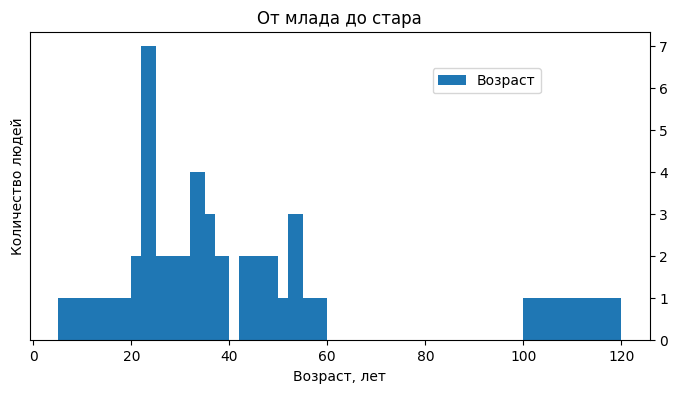

In [16]:
# Одна гистограмма для количественного признака:
# осмысленный выбор числа корзин ( bins),
# Подписи осей и заголовка.

fig, ax = plt.subplots(figsize=(8, 4)) # размер полотна

ax.hist(df['age'], bins=[df['age'].min(), 10, 20, 22, 25, 27, 30, 32, 35, 37, 40, 
                         42, 45, 47, 50, 52, 55, 57, 60, 80, 100, df['age'].max()], 
        label='Возраст')
ax.legend(loc=(0.65, 0.8)) # отображаем легенду и задаем ее расположение
ax.set_title('От млада до стара') # название второго графика
ax.yaxis.tick_right() # устанавливаем, что вертикальная ось должна быть справа
ax.set_xlabel('Возраст, лет')
ax.set_ylabel('Количество людей')

plt.savefig('figures/age-count-hist.png')
plt.show()
# Если человеку 120 лет ОН ДОЛГОЖИТЕЛЬ, ЭТО НОРМА (если не нравится см пункт про аномалии)
# Уж очень много народу между 20 и 60, попыталась сделать выборку почаще в этом промежутке

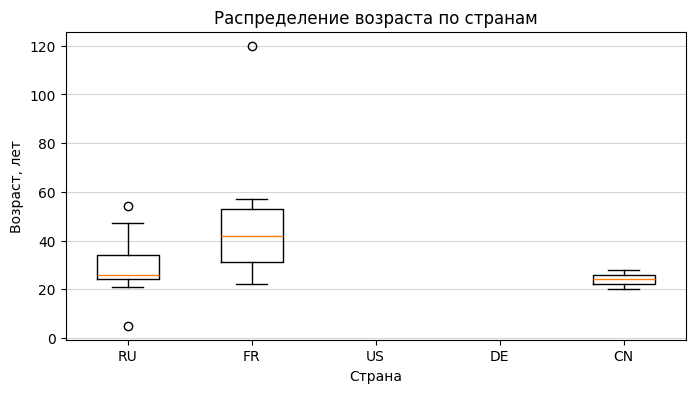

In [17]:
# Один боксплот (boxplot) для числового признака:

# можно как общее, так и по группам (например, по категориям),
# ось доставки и заголовок.

fig, ax = plt.subplots(figsize=(8, 4))

top_countries = df['country'].value_counts().index
ax.boxplot([df[df['country'] == country]['age'] for country in top_countries])
ax.set_title('Распределение возраста по странам')
ax.set_ylabel('Возраст, лет')
ax.set_xlabel('Страна')
ax.set_xticks(range(1, len(top_countries) + 1))
ax.set_xticklabels(top_countries)
ax.grid(axis='y', alpha=0.5)

plt.savefig('figures/age-country-box.png', dpi=300, bbox_inches='tight')
plt.show()


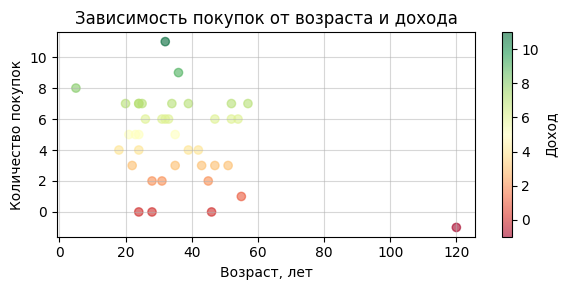

In [18]:
# Одна диаграмма рассеяния (диаграмма рассеяния) для пары количественных признаков:

# отправить сообщение осей,
# заголовок,
# При желании можно добавить цвет/легенду для различия категорий.
fig, ax = plt.subplots(figsize=(6, 3))

# Диаграмма рассеяния: возраст vs покупки
scatter = ax.scatter(df['age'], df['purchases'], c=df['purchases'], alpha=0.6, cmap='RdYlGn')
ax.set_title('Зависимость покупок от возраста и дохода')
ax.set_xlabel('Возраст, лет')
ax.set_ylabel('Количество покупок')
ax.grid(alpha=0.5)
plt.colorbar(scatter, ax=ax, label='Доход')

plt.tight_layout()
plt.savefig('figures/age-purch-scatter.png', dpi=300, bbox_inches='tight')
plt.show()